#**Install Packages & Library**

In [1]:
!pip install super-gradients==3.2.0

In [2]:
from super_gradients.training import models


[2024-06-10 06:03:57] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into /root/sg_logs/console.log


[2024-06-10 06:03:59] WARNING - __init__.py - Failed to import pytorch_quantization
[2024-06-10 06:04:02] INFO - utils.py - NumExpr defaulting to 2 threads.
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
[2024-06-10 06:04:04] WARNING - calibrator.py - Failed to import pytorch_quantization
[2024-06-10 06:04:04] WARNING - export.py - Failed to import pytorch_quantization
[2024-06-10 06:04:04] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization


#**Get model**

In [3]:
dataset_params = {
    'classes': ['Dust Mask', 'Eye Wear', 'Glove', 'Protective Boots', 'Protective Helmet', 'Safety Vest', 'Shield']
}

In [5]:
best_model = models.get('yolo_nas_s',
                        num_classes=len(dataset_params['classes']),
                        checkpoint_path="/content/yolo-nas-finetuned2.pth") # ubah ke path model finetuned

[2024-06-10 06:04:37] INFO - checkpoint_utils.py - Successfully loaded model weights from /content/yolo-nas-finetuned2.pth EMA checkpoint.


#**Predicting image with the best model**



[2024-06-10 06:04:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


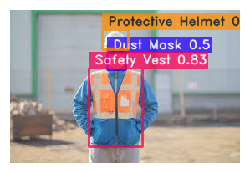

In [6]:
img_url = '/content/apd.jpg' #ubah alamat ke file gambar anda
best_model.predict(img_url).show()

#**Predicting image with the best model**



In [7]:
input_video_path = f"/content/apd-vid.mp4" #ubah  alamat ke vide anda
output_video_path = "detections1.mp4"

In [8]:
import torch
device = 'cuda' if torch.cuda.is_available() else "cpu"

In [9]:
best_model.to(device).predict(input_video_path).save(output_video_path)

Predicting Video: 100%|██████████| 125/125 [00:03<00:00, 38.92it/s]


#**Menampilkan Video**

In [10]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/detections1.mp4'

# Compressed video path
compressed_path = "/result_compressed.mp4" #pastikan tidak ada nama file yang sama

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)